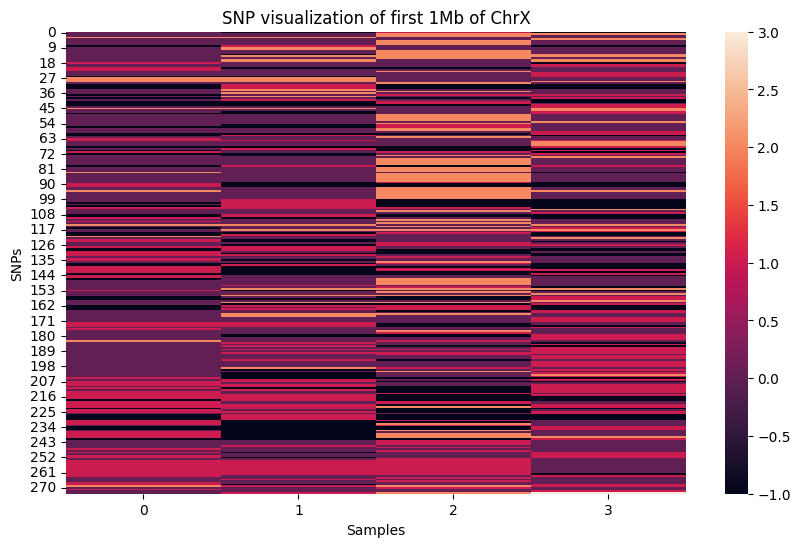

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

# 1. Read CSV as a matrix (no headers) and convert to numpy array
snp_matrix = pd.read_csv("data/processed/DNAseq/vcf/out.012", header=None, delimiter='\t').to_numpy()
snp_matrix_rotated = np.flipud(snp_matrix.T)  # Transpose and flip vertically

#2. set breaks and colors
cmap = ListedColormap(["pink", "blue", "purple"])
bounds = [-0.5, 0.5, 1.5, 2.5]  # Define breaks (like R)
norm = BoundaryNorm(bounds, cmap.N)
#3. Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))  # Set figure size

sns.heatmap(snp_matrix_rotated, cbar=True)
plt.xlabel("Samples")
plt.ylabel("SNPs")
plt.title("SNP visualization of first 1Mb of ChrX")
plt.savefig("snp_visualization")
plt.show()


In [52]:
def filter_isogenic_snp(df):
   #Remove individuals with 1 (heterogenous) snps 
    columns_without_1 = df.loc[:, ~(df == 1).any(axis=0)]

    # Step 2: Remove columns where the sum of the last four rows is NOT 4
    filtered_df = columns_without_1.loc[:, (columns_without_1.iloc[-4:].sum() == 4)]

    return filtered_df
#Apply the filter to the out.021 to filter isogenic snps
snps=pd.read_csv("data/processed/DNAseq/vcf/out.012", header=None, delimiter='\t')
isogenic_snp=filter_isogenic_snp(snps)
isogenic_snp



,106,113,117,245,246,256,257,270,272
0,0,0,0,2,2,0,0,2,0
1,2,2,2,2,2,2,2,2,0
2,2,2,2,0,0,0,0,0,2
3,0,0,0,0,0,2,2,0,2


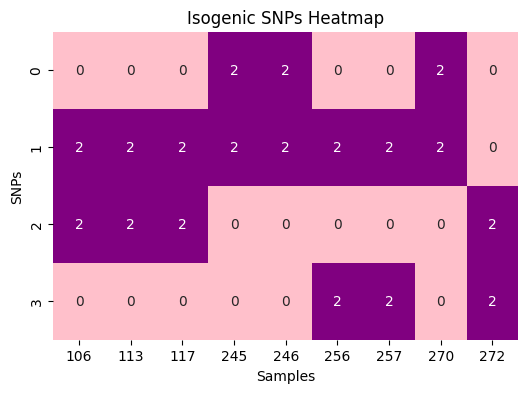

In [53]:
plt.figure(figsize=(6, 4))
cmap = ListedColormap(["pink", "blue", "purple"])
sns.heatmap(isogenic_snp, cmap=cmap, annot=True, cbar=False)
plt.title("Isogenic SNPs Heatmap")
plt.xlabel("Samples")
plt.ylabel("SNPs")
plt.savefig("snp_isogenic")
plt.show()

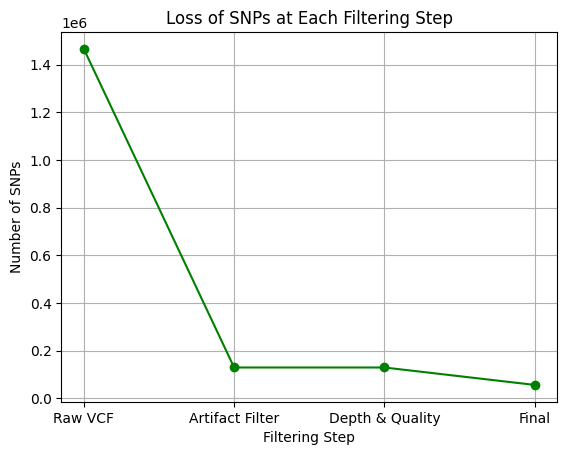

In [54]:
# plot snp after filtering steps

import matplotlib.pyplot as plt

# Example data (Replace with actual counts)
filter_steps = ["Raw VCF", "Artifact Filter", "Depth & Quality", "Final"]
num_snps = [1465941, 129751, 129751, 56672]

plot= plt.plot(filter_steps, num_snps, marker='o', linestyle='-', color='green')
plt.xlabel("Filtering Step")
plt.ylabel("Number of SNPs")
plt.title("Loss of SNPs at Each Filtering Step")
plt.grid(True)
plt.savefig("snp-filtering-plot.png")
plt.show()
